<a href="https://colab.research.google.com/github/bsttiv/tipos_espectrales/blob/main/Tipos_Espectrales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Se monta el drive para cargar los datos
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Se importa pandas para procesar los datos
import pandas as pd
import numpy as np

In [34]:
# Tipos espectrales en los q estamos interesados
tipos_espectrales = ["O", "B", "A", "F", "G", "K", "M"]

In [18]:
# Funciones que se usan en el parámetro converters del método read_csv
# Su objetivo es filtrar los datos y eliminar aquellos que no estén en el formato correcto

def texto_a_float(texto):
  try:
    return np.float64(texto.strip())
  except Exception:
    return np.nan

def texto_a_mayusculas(texto):
  try:
    return texto.strip().upper()
  except Exception:
    return "NaN"

In [35]:
# Ruta de la base de datos
ruta = "drive/MyDrive/Modulo/Tipos_Espectrales/hip_main.dat"
# Nombres de las columnas (según la especificación de https://heasarc.gsfc.nasa.gov/w3browse/all/hipparcos.html)
names = ["H"+str(i) for i in range(0, 78)]
# Se lee la base de datos con los parámetros adecuados
df = pd.read_csv(ruta, sep="|", converters={"H76": texto_a_mayusculas, "H32": texto_a_float, "H37": texto_a_float, "H40": texto_a_float}, names=names, keep_default_na=False)
# Se eliminan aquellas filas cuyo tipo espectral no coincida con los buscados (O, B, A, F, G, K, M)
df = df[df["H76"].str[0].isin(tipos_espectrales)]
# Se borran las columnas que no se usarán
labels = ["H"+str(i) for i in range(0, 78) if i not in [76, 32, 37, 40]]
df.drop(labels=labels, inplace=True, axis=1)
# Se muestra el DataFrame
df

<ipython-input-35-a6798e24c4d2>:6: DtypeWarning: Columns (5,44,45) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(ruta, sep="|", converters={"H76": texto_a_mayusculas, "H32": texto_a_float, "H37": texto_a_float, "H40": texto_a_float}, names=names, keep_default_na=False)


,H32,H37,H40,H76
0,9.643,0.482,0.55,F5
1,10.519,0.999,1.04,K3V
2,6.576,-0.019,0.00,B9
3,8.471,0.370,0.43,F0V
4,9.693,0.902,0.90,G8III
...,...,...,...,...
118213,9.107,1.595,1.61,K2
118214,9.019,0.639,0.70,G2V
118215,8.868,0.999,0.98,K0
118216,10.077,0.698,0.75,G5V


In [19]:
# Se extraen las filas de cada tipo espectral para posteriormente usar el método describe
# Y visualizar las estadísticas de los datos

df_tipo_o = df[df["H76"].str[0] == "O"]
df_tipo_b = df[df["H76"].str[0] == "B"]
df_tipo_a = df[df["H76"].str[0] == "A"]
df_tipo_f = df[df["H76"].str[0] == "F"]
df_tipo_g = df[df["H76"].str[0] == "G"]
df_tipo_k = df[df["H76"].str[0] == "K"]
df_tipo_m = df[df["H76"].str[0] == "M"]

In [10]:
df_tipo_o.describe()

,H32,H37,H40
count,256.000000,263.000000,263.000000
mean,8.005199,0.243483,0.279354
std,1.820054,0.357988,0.372961
min,1.566000,-0.335000,-0.370000
25%,7.068000,0.010000,0.030000
50%,8.174500,0.171000,0.180000
75%,9.240250,0.411500,0.490000
max,11.624000,2.700000,2.700000


In [11]:
df_tipo_b.describe()

,H32,H37,H40
count,10362.000000,10395.000000,10395.000000
mean,7.845423,0.046945,0.068189
std,1.489619,0.191334,0.202497
min,0.312000,-0.400000,-0.420000
25%,7.009250,-0.066000,-0.040000
50%,7.987000,-0.004000,0.020000
75%,8.846000,0.102000,0.110000
max,12.843000,3.010000,3.020000


In [12]:
df_tipo_a.describe()

,H32,H37,H40
count,18587.000000,18623.000000,18623.000000
mean,8.231872,0.180116,0.206080
std,1.209748,0.148270,0.159113
min,1.248000,-0.400000,-0.290000
25%,7.583000,0.075000,0.090000
50%,8.351000,0.170000,0.190000
75%,9.025500,0.267000,0.300000
max,11.934000,1.745000,2.160000


In [13]:
df_tipo_f.describe()

,H32,H37,H40
count,25349.000000,25438.000000,25438.000000
mean,9.072586,0.476829,0.542982
std,1.159244,0.117954,0.117259
min,-0.417000,-0.400000,-0.160000
25%,8.408000,0.409000,0.480000
50%,9.134000,0.472000,0.540000
75%,9.847000,0.531000,0.600000
max,12.839000,2.180000,2.780000


In [14]:
df_tipo_g.describe()

,H32,H37,H40
count,22478.000000,22606.000000,22606.000000
mean,9.539559,0.787131,0.817998
std,1.076213,0.206621,0.172182
min,3.418000,-0.400000,-0.100000
25%,8.979000,0.625000,0.690000
50%,9.658000,0.739000,0.790000
75%,10.245750,0.955000,0.940000
max,12.869000,2.215000,2.960000


In [15]:
df_tipo_k.describe()

,H32,H37,H40
count,31447.000000,31907.000000,31907.000000
mean,9.712988,1.203302,1.197688
std,1.125857,0.234864,0.254945
min,1.629000,-0.400000,-0.060000
25%,9.083000,1.040000,1.020000
50%,9.853000,1.166000,1.130000
75%,10.460000,1.366000,1.350000
max,13.130000,2.900000,3.780000


In [16]:
df_tipo_m.describe()

,H32,H37,H40
count,4151.000000,4856.000000,4856.000000
mean,10.173593,1.551563,2.259559
std,1.353718,0.206345,0.703973
min,2.849000,0.000000,0.010000
25%,9.363000,1.466000,1.800000
50%,10.351000,1.573500,2.130000
75%,11.132500,1.652000,2.560000
max,13.247000,3.315000,9.030000


Los campos a utilizar serán "H32" (que corresponde a magnitud); "H37", "H40" (índices de color); y "H76" (tipo espectral)

https://heasarc.gsfc.nasa.gov/w3browse/all/hipparcos.html

# Visualización de los datos

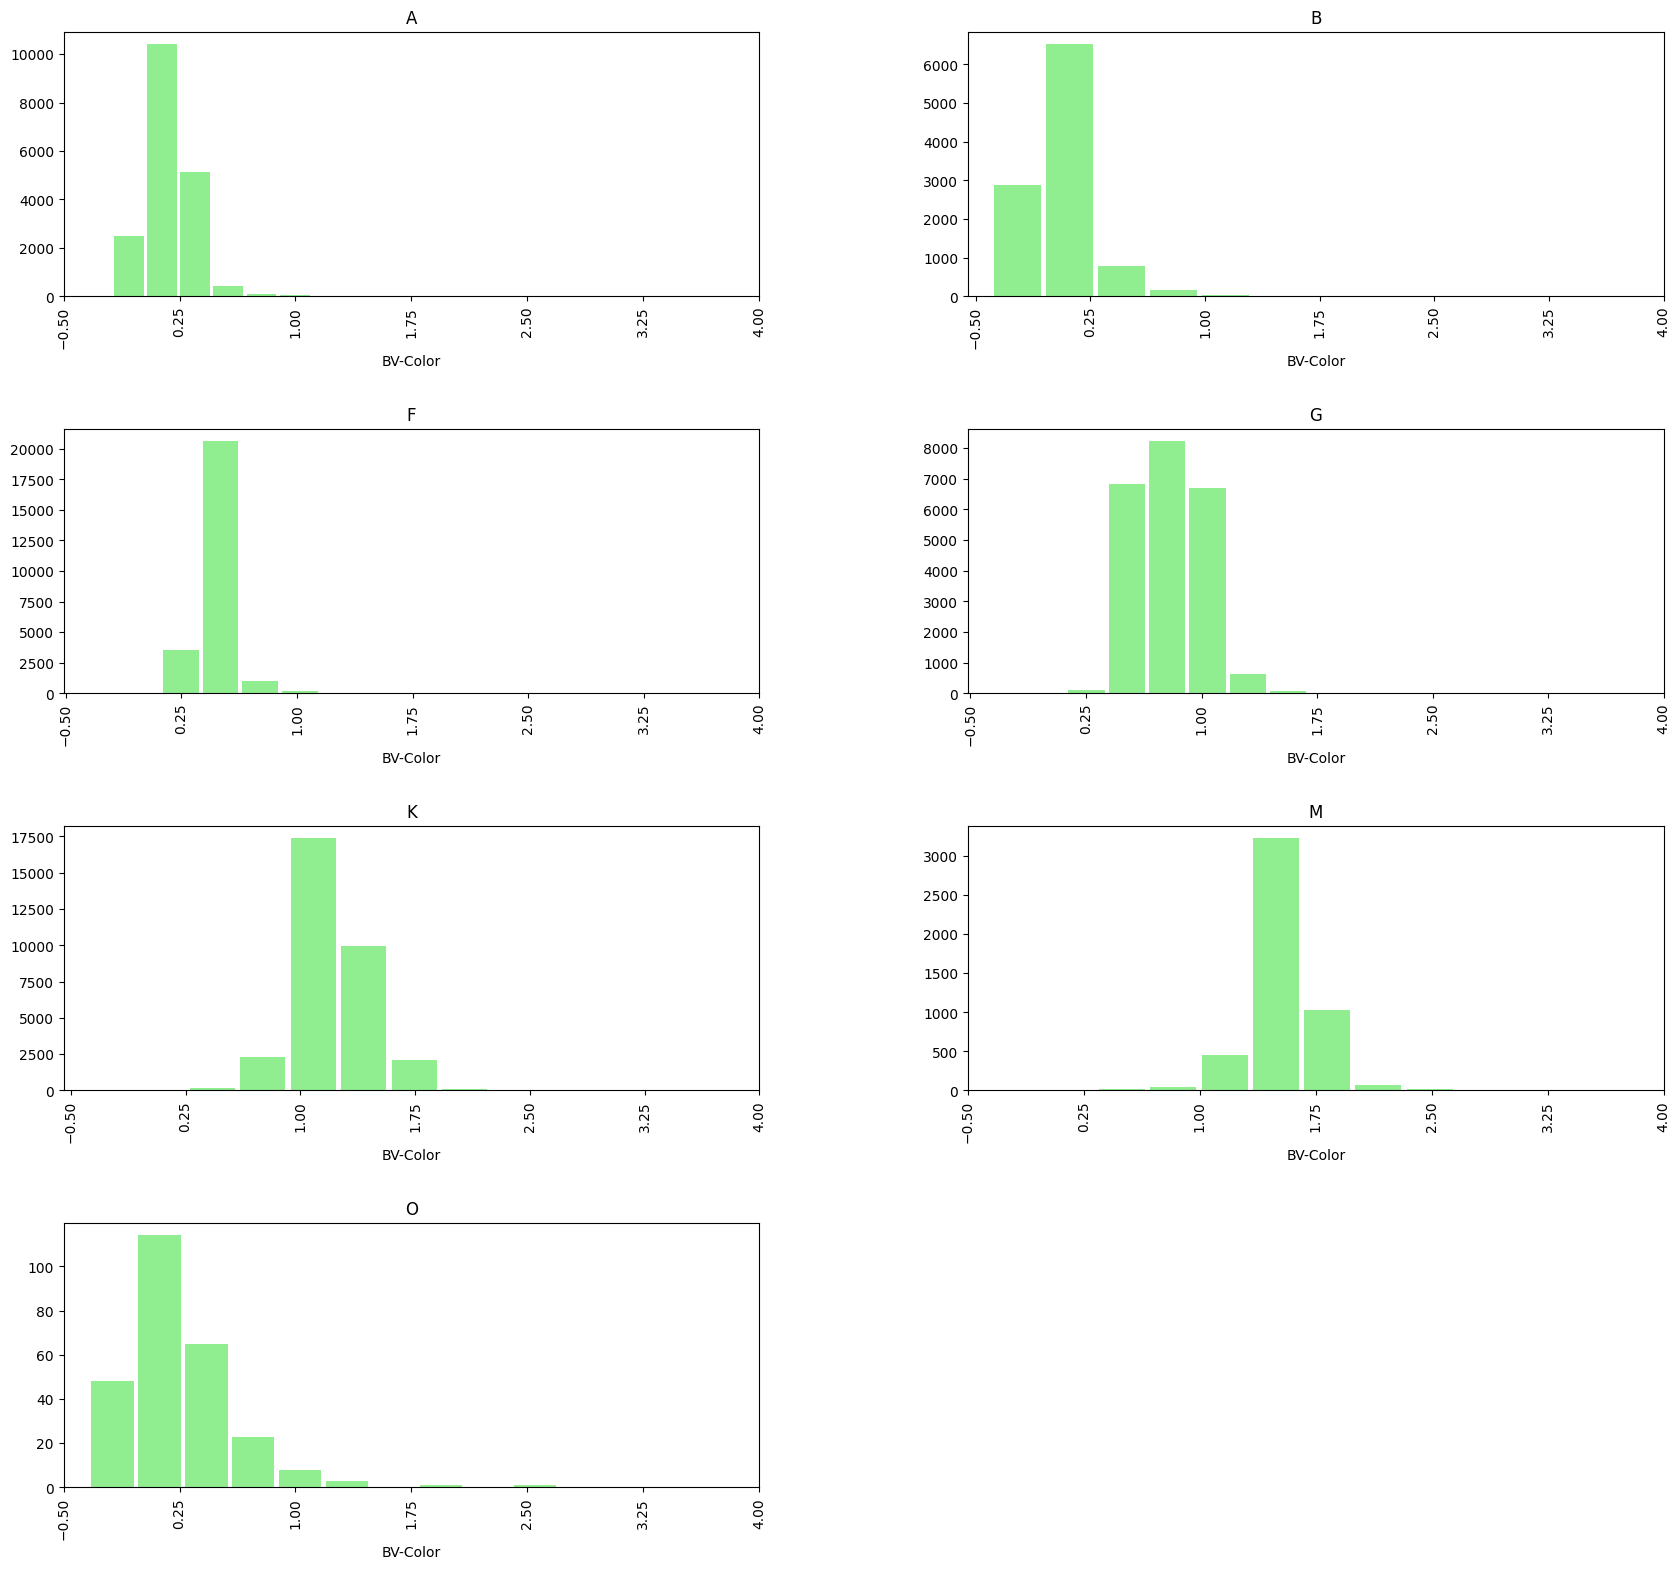

In [38]:
import matplotlib.pyplot as plt

# Histograma BV-Color
ax = df.hist(column="H37", by=df["H76"].str[0], figsize=(20,30), layout=(6,2), color='lightgreen', rwidth=0.9)

for row in ax:
  for x in row:
    x.set_xlabel("BV-Color")
    x.set_xticks(np.linspace(-0.5, 4, 7))

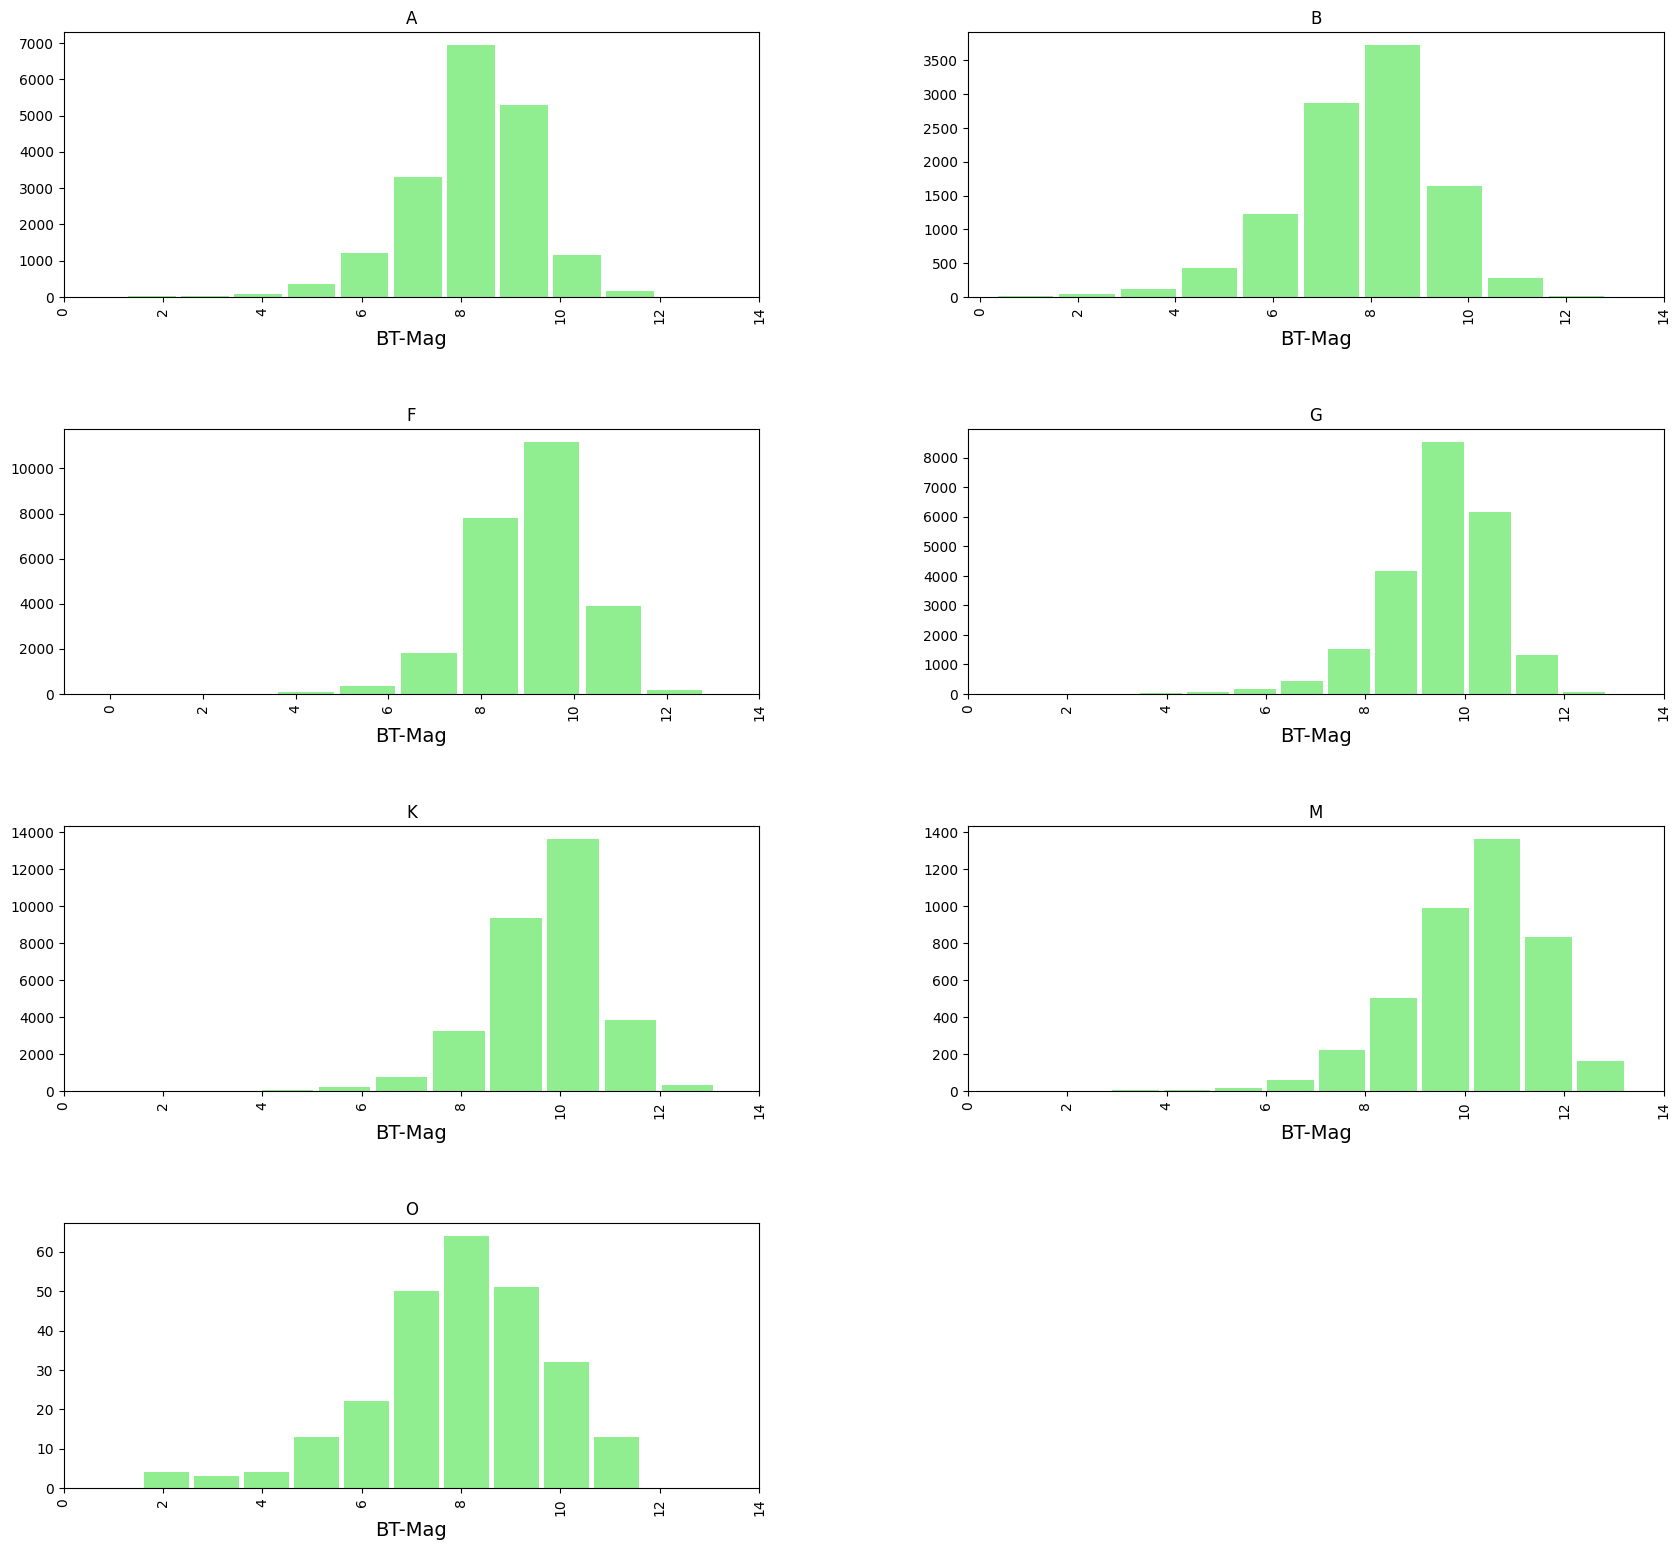

In [41]:
# Histograma BT-Mag
ax = df.hist(column="H32", by=df["H76"].str[0], figsize=(20,30), layout=(6,2), color='lightgreen', rwidth=0.9)

for row in ax:
  for x in row:
    x.set_xlabel("BT-Mag", size=14)
    x.set_xticks(range(0, 15, 2))

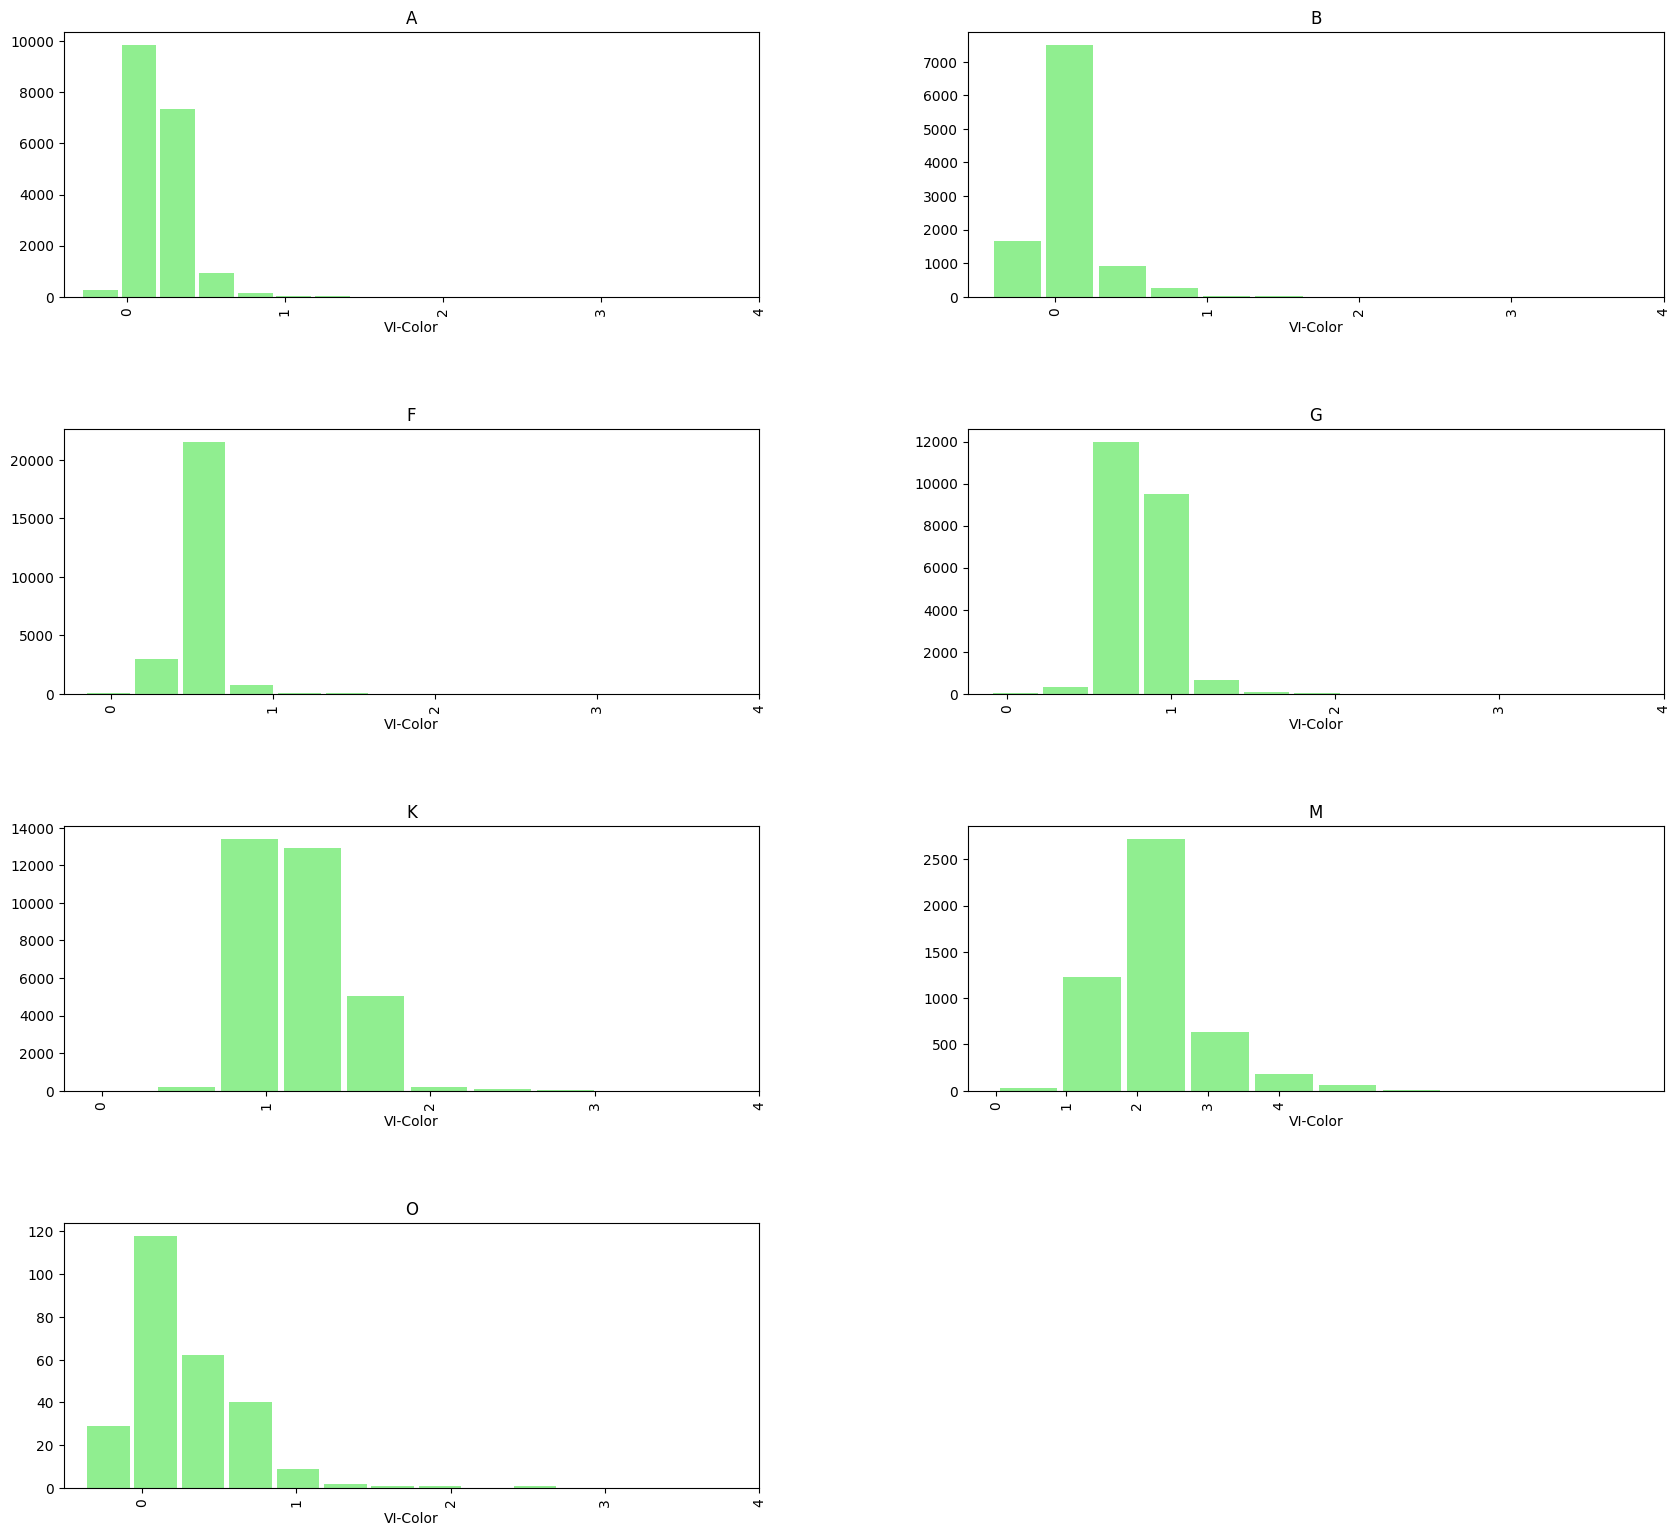

In [42]:
# Histograma VI-Color
ax = df.hist(column="H40", by=df["H76"].str[0], figsize=(20,30), layout=(6,2), color='lightgreen', rwidth=0.9)

for row in ax:
  for x in row:
    x.set_xlabel("VI-Color")
    x.set_xticks(np.linspace(0, 4, 5))

# Modelo de machine learning

https://youtube.com/watch?v=AYICIq5jnhU&si=3e1M0dp2M4Jl7j5Y

https://www.datacamp.com/tutorial/random-forests-classifier-python